<a href="https://colab.research.google.com/github/byronacunia/UFCA_estudo_mercado_livre/blob/main/UFCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise Mercado Cativo

## Passo 1: Definição do tipo de Contrato

*   **Tipo de Contrato:** Vigencia única (Flat)
*   **Tipo de Consumidor:** Especial
*   **Energia Incentivada:** 50%, 80%, 100%



## Passo 2: Cálculo do valor da TUSD no cativo

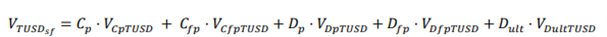

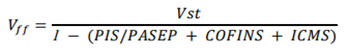

In [1]:
!git clone https://github.com/byronacunia/UFCA_estudo_mercado_livre.git

Cloning into 'UFCA_estudo_mercado_livre'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [2]:
import pandas as pd

In [4]:
abas_de_excel =  pd.ExcelFile("/content/UFCA_estudo_mercado_livre/Raw Data/UFCA.xlsx")
abas_de_excel.sheet_names

['Apresentação', 'UC1', 'UC2', 'UC3', 'UC4']

In [6]:
UC1 = abas_de_excel.parse("UC1")
UC2 = abas_de_excel.parse("UC2")
UC3 = abas_de_excel.parse("UC3")
UC4 = abas_de_excel.parse("UC4")

In [45]:
demanda_contratada = 139 #[kW]
#Tarifas de consumo e usos
Tarifa_total_FP=0.40733
Tarifa_total_P=1.81318
TUSD_FP=Tarifa_total_FP*0.22
TUSD_P=Tarifa_total_P*0.74
TE_FP=Tarifa_total_FP-TUSD_FP
TE_P= Tarifa_total_P-TUSD_P
RetencaoFederal=0.0620


In [49]:
X1 = UC1[UC1['ANO']==2019][['MÊS','ENERGIA_PONTA', 'ENERGIA_FPONTA', 'DEMANDA_REGISTRADA_P', 'DEMANDA_REGISTRADA_FP', 'DEMANDA_ULTRAPASSAG', 'TAR_ULTRAPASSAG', 'TAR_TUSD_KW_FP', 'TAR_DEMANDA_FP_SEM ICMS']]
X1[['DEMANDA_ULTRAPASSAG', 'TAR_ULTRAPASSAG', 'TAR_DEMANDA_FP_SEM ICMS']] = X1[['DEMANDA_ULTRAPASSAG', 'TAR_ULTRAPASSAG', 'TAR_DEMANDA_FP_SEM ICMS']].fillna(0)
X1[['Differença Demanda']] = X1[['DEMANDA_REGISTRADA_FP']] - demanda_contratada
X1[['Valor Demanda']] = (X1['DEMANDA_REGISTRADA_FP'] * X1['TAR_TUSD_KW_FP']) +(X1['Differença Demanda'] *-1* X1['TAR_DEMANDA_FP_SEM ICMS'])
X1[['Valor Consumo P+FP TUSD']] = (TUSD_FP*X1['ENERGIA_FPONTA'])+(TUSD_P*X1['ENERGIA_PONTA'])
X1[['Valor Consumo TE']] = (TE_FP*X1['ENERGIA_FPONTA'])+(TE_P*X1['ENERGIA_PONTA'])
X1[['Valor da conta no cativo']] = (X1['Valor Demanda']+X1['Valor Consumo P+FP TUSD']+X1['Valor Consumo TE'])-((X1['Valor Demanda']+X1['Valor Consumo P+FP TUSD']+X1['Valor Consumo TE'])*RetencaoFederal)
X1[['Valor consumo TUSD_P']]= (TUSD_P*X1['ENERGIA_PONTA'])
X1[['Valor consumo TUSD_FP']]= (TUSD_FP*X1['ENERGIA_FPONTA'])
X1

,MÊS,ENERGIA_PONTA,ENERGIA_FPONTA,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,DEMANDA_ULTRAPASSAG,TAR_ULTRAPASSAG,TAR_TUSD_KW_FP,TAR_DEMANDA_FP_SEM ICMS,Differença Demanda,Valor Demanda,Valor Consumo P+FP TUSD,Valor Consumo TE,Valor da conta no cativo,Valor consumo TUSD_P,Valor consumo TUSD_FP
52,Janeiro,1232,19079,57.12,100.80,0.00,0.00000,20.00873,14.31754,-38.20,2563.810012,3362.758738,6642.528092,11789.812838,1653.039942,1709.718795
53,Fevereiro,1077,17637,38.64,95.34,0.00,0.00000,20.25635,14.44366,-43.66,2561.850605,3025.565623,6111.308447,10973.403745,1445.068196,1580.497426
54,Março,1120,17950,28.98,109.62,0.00,0.00000,19.53986,14.07522,-29.38,2555.489417,3111.309754,6231.025346,11160.159397,1502.763584,1608.546170
55,Abril,2354,26068,87.36,144.06,0.00,0.00000,19.97938,0.00000,5.06,2878.229483,5494.508290,9391.995870,16663.320157,3158.487033,2336.021257
56,Maio,2163,22733,67.20,152.46,13.46,42.01412,21.00833,0.00000,13.46,3202.929992,4939.375407,8242.365823,15368.821606,2902.212172,2037.163236
57,Junho,2400,24845,86.94,154.14,15.14,43.80317,21.90197,0.00000,15.14,3375.969656,5446.632727,9025.113123,16741.157144,3220.207680,2226.425047
58,Julho,2316,22334,79.80,137.76,0.00,0.00000,21.86411,15.75000,-1.24,3031.529794,5108.908220,8187.724880,15315.816794,3107.500411,2001.407808
59,Agosto,1213,14889,37.80,80.64,0.00,0.00000,23.20945,16.43420,-58.36,2830.709960,2961.788633,5302.335077,10406.953982,1627.546632,1334.242001
60,Setembro,2975,26607,83.16,137.76,0.00,0.00000,22.18975,15.91935,-1.24,3076.599954,6376.038218,9856.001592,18111.504099,3991.715770,2384.322448
61,Outubro,3297,28142,110.46,140.70,0.00,0.00000,20.87043,0.00000,1.70,2936.469501,6945.638090,10495.497230,19114.193322,4423.760300,2521.877789
